In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the citipy Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


## Req 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
#### Use the OpenWeatherMap to retrieve weather data from the cities list generated in the starter code

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# test the code to see the json file structure
# response = requests.get(query_url + 'Cave Creek').json()
# sample_weather = response
# sample_weather


{'coord': {'lon': -111.9508, 'lat': 33.8333},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 23.77,
  'feels_like': 23.3,
  'temp_min': 22.13,
  'temp_max': 25.3,
  'pressure': 1012,
  'humidity': 42},
 'visibility': 10000,
 'wind': {'speed': 2.24, 'deg': 207, 'gust': 4.92},
 'clouds': {'all': 0},
 'dt': 1698516662,
 'sys': {'type': 2,
  'id': 2008769,
  'country': 'US',
  'sunrise': 1698500597,
  'sunset': 1698539982},
 'timezone': -25200,
 'id': 5288858,
 'name': 'Cave Creek',
 'cod': 200}

In [6]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
#print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beyneu
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | chibougamau
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | yuzhno-kurilsk
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | nasir
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | svetlyy
Processing Record 13 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | bhimunipatnam
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | tanumah
Processing Record 19 of Set 1 | selfoss
Processing Record 20 of Set 1 | kushiro
Processing Record 21 of Set 1 | barcelos
Processing Re

In [7]:
# convert the cities' weather data into a PD dataframe and show the record count

city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [8]:
# display the sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beyneu,45.3167,55.2000,18.62,53,100,2.70,KZ,1698516727
1,port elizabeth,-33.9180,25.5701,11.84,89,91,0.89,ZA,1698516453
2,chibougamau,49.9168,-74.3659,0.79,86,75,6.69,CA,1698516197
3,port-aux-francais,-49.3500,70.2167,5.14,98,100,8.20,TF,1698516728
4,badger,64.8000,-147.5333,-6.22,86,0,1.54,US,1698516728


In [9]:
# export the city_data into a csv file
city_data_df.to_csv("output_data/cities.csv", index_label='City_ID')

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# display the sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beyneu,45.3167,55.2000,18.62,53,100,2.70,KZ,1698516727
1,port elizabeth,-33.9180,25.5701,11.84,89,91,0.89,ZA,1698516453
2,chibougamau,49.9168,-74.3659,0.79,86,75,6.69,CA,1698516197
3,port-aux-francais,-49.3500,70.2167,5.14,98,100,8.20,TF,1698516728
4,badger,64.8000,-147.5333,-6.22,86,0,1.54,US,1698516728


### Create Scatter Plots

#### Latitude vs. Temp

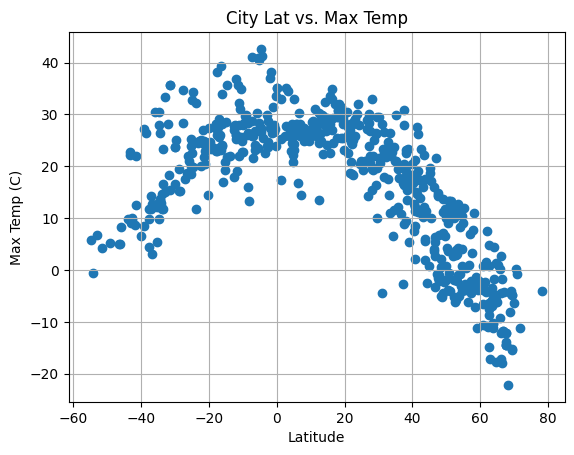

In [11]:
# build scatter plot for latitude vs. temp
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
plt.title("City Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)

# save the figure
plt.savefig("output_data/Fig1.png")

#### Latitude vs. Humidity

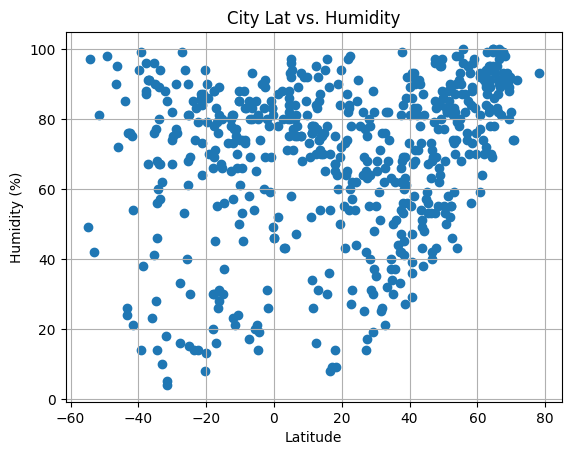

In [12]:
# build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
plt.title("City Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# save the figure
plt.savefig("output_data/Fig2.png")

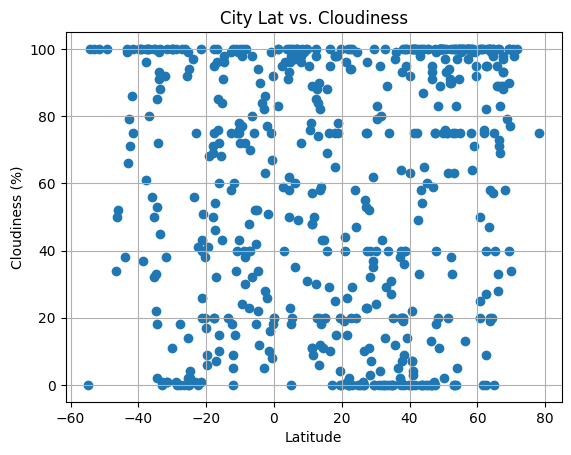

In [13]:
# build a scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")
plt.title("City Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# save the figure
plt.savefig("output_data/Fig3.png")

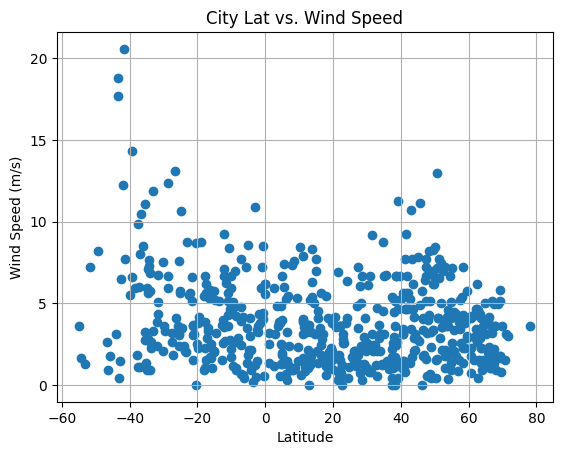

In [14]:
# build a scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")
plt.title("City Lat vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# save the figure
plt.savefig("output_data/Fig4.png")

### Req 2: Computer Linear Regressions for Each Relationship

In [15]:
# define a function to create linear regression plots. store "lng" in the y-value so the code will run, for now. 
y_value = city_data_df["Lng"]
(slope, intercept, rvalue, pvalue, sderr) = linregress(city_data_df["Lat"], y_value)
regress_values = city_data_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [16]:
# create a dataframe with the northern hemisphere data (lat >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beyneu,45.3167,55.2000,18.62,53,100,2.70,KZ,1698516727
2,chibougamau,49.9168,-74.3659,0.79,86,75,6.69,CA,1698516197
4,badger,64.8000,-147.5333,-6.22,86,0,1.54,US,1698516728
6,yuzhno-kurilsk,44.0306,145.8556,11.32,87,87,2.90,RU,1698516729
8,nasir,15.5894,32.5634,33.61,30,88,4.50,SD,1698516729


In [17]:
# create a dataframe with the southern hemisphere data (lat <= 0)

southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,11.84,89,91,0.89,ZA,1698516453
3,port-aux-francais,-49.3500,70.2167,5.14,98,100,8.20,TF,1698516728
5,touros,-5.1989,-35.4608,28.38,65,18,8.60,BR,1698516481
7,waitangi,-43.9535,-176.5597,9.90,85,38,3.13,NZ,1698516729
9,margaret river,-33.9500,115.0667,14.64,80,93,5.74,AU,1698516729


#### Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8773503604672517


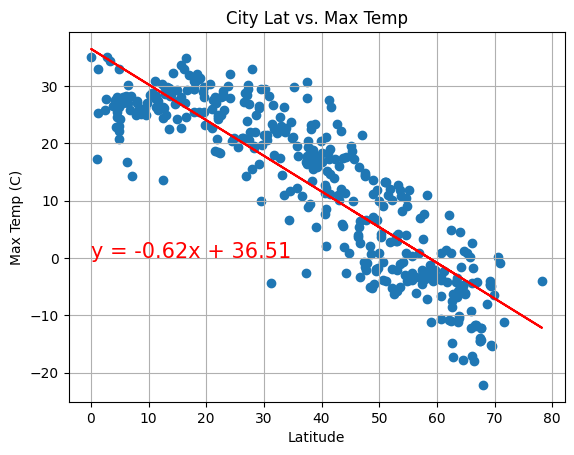

In [18]:
# plot the linear regression for the northern hemisphere
n_lat = northern_hemi_df['Lat']
n_temp = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")
plt.title("City Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(0, 0), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: 0.6772009117958182


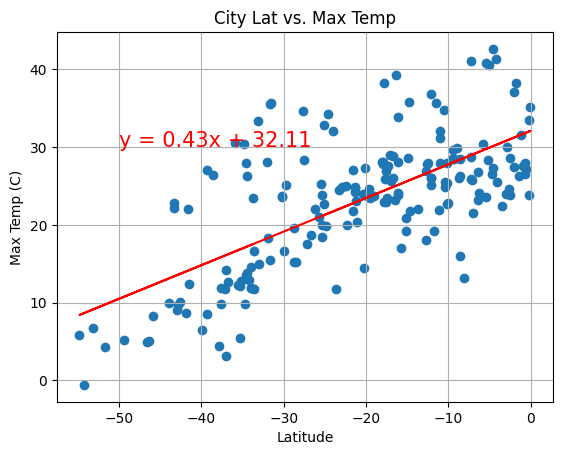

In [19]:
# plot the linear regression for the southern hemisphere
s_lat = southern_hemi_df['Lat']
s_temp = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")
plt.title("City Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 30), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

##### Analysis
When we plot the latitude vs. the temperature for a random sample of cities, you see a relatively strong correlation. As you move away from the equator, maximum temperatures will decrease regardless of which direction you move. This is consistent across both datasets even though there are more samples in the northern hemisphere. 

### Humidity vs Latitude Linear Regression Plot

The r-value is: 0.286363856207849


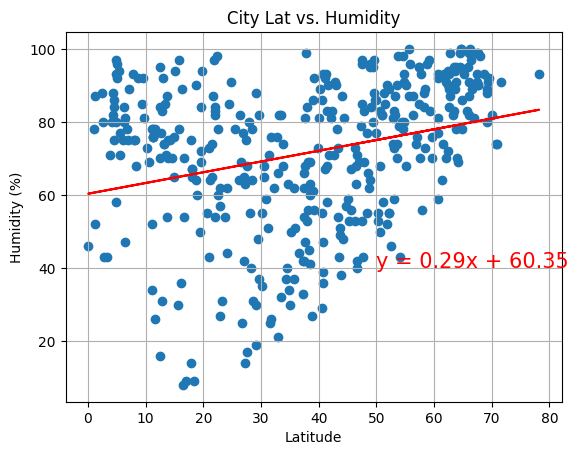

In [20]:
# plot the linear regression for the northern hemisphere
n_lat = northern_hemi_df['Lat']
n_hum = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")
plt.title("City Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(50, 40), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: -0.01658987954605966


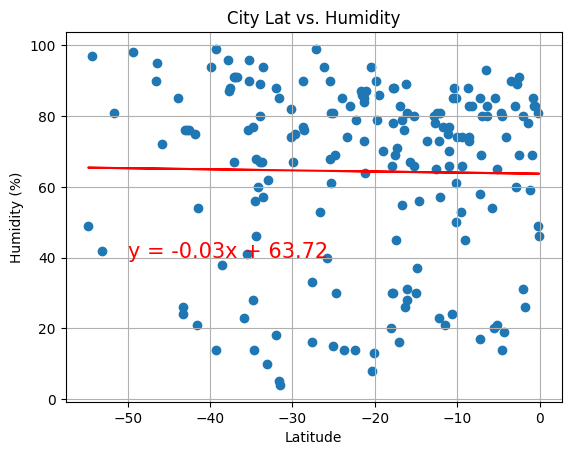

In [21]:
# plot the linear regression for the southern hemisphere
s_lat = southern_hemi_df['Lat']
s_hum = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_hum)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")
plt.title("City Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 40), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

#### Analysis
When we plot relative humidity against latitude, we observe almost no correlation between the data. This makes sense because relative humidity is often correlated to a city's proximity in relation to bodies of water, rather than latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.286363856207849


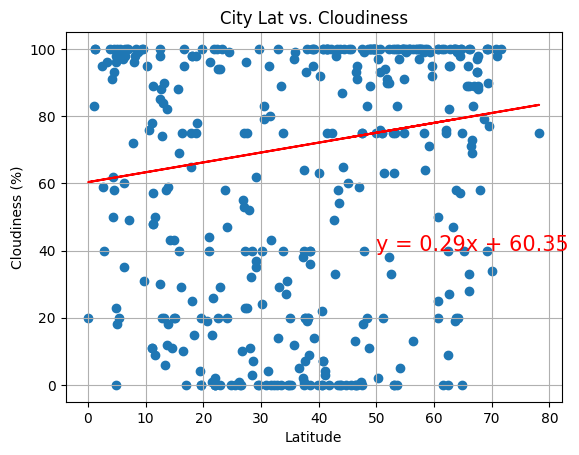

In [22]:
# plot the linear regression for the northern hemisphere
n_lat = northern_hemi_df['Lat']
n_cloud = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")
plt.title("City Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(50, 40), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: -0.14895626782561888


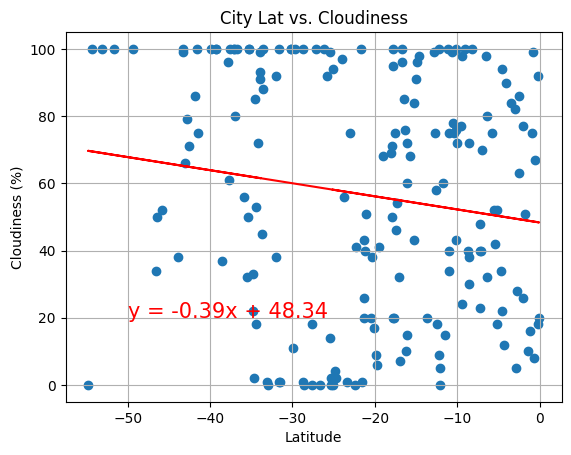

In [25]:
# plot the linear regression for the southern hemisphere

s_lat = southern_hemi_df['Lat']
s_cloud = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_cloud)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")
plt.title("City Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 20), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

#### Analysis

The relationship between a city's latitide and its cloudiness is weak, according to the analysis. The relatively low r-values indicate that we don't observe a strong correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0429988344162024


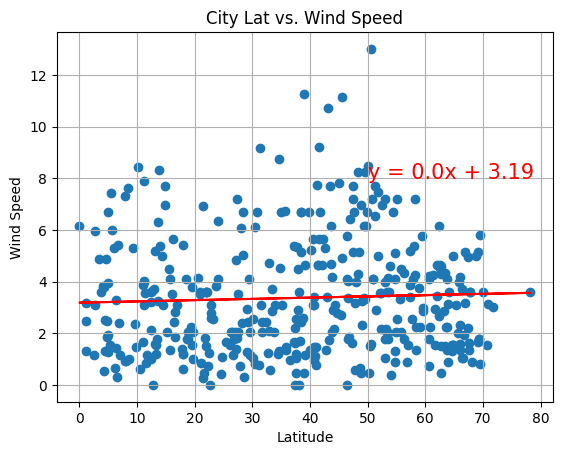

In [27]:
# plot the linear regression for the northern hemisphere
n_lat = northern_hemi_df['Lat']
n_wind = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_wind)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")
plt.title("City Lat vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(50, 8), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: -0.23746394305013802


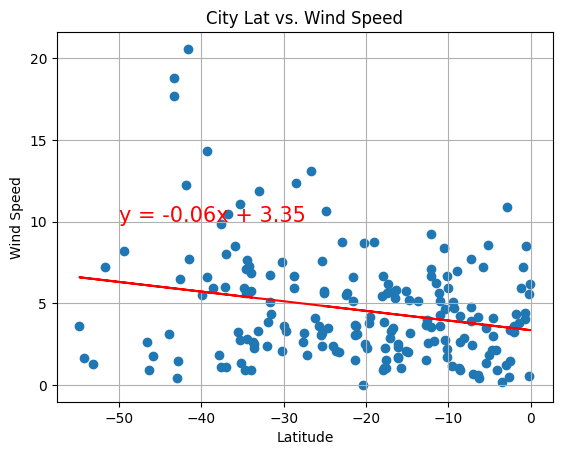

In [29]:
# plot the linear regression for the southern hemisphere
s_lat = southern_hemi_df['Lat']
s_wind = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_wind)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")
plt.title("City Lat vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 10), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

#### Analysis

There's virtually no correlation between wind speed and latitude, according to the data. 